In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression
import string
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
tasmania_df = pd.read_csv('Data_sets/Tasmania_Data.csv')

tasmania_df.columns = [f'X{i+1}' for i in range(16)] + [f'Y{i+1}' for i in range(16)] + [f'P{i+1}' for i in range(16)] + ['Power_all']

tasmania_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Power_all
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,300.331259,294.455437,289.068078,263.390922,307.689304,246.710611,278.578414,286.572733,276.478777,299.829485,...,232384.032157,235201.115988,239331.980809,235166.818700,234747.206701,233791.508560,235309.867518,238325.284397,236812.339489,3.760137e+06
std,191.472836,178.335205,180.894084,181.188277,192.544141,182.996380,182.148957,169.950718,179.503460,185.270575,...,28444.508021,29020.010182,28813.597754,28734.266364,28698.333219,28353.824899,28499.047384,28693.896083,28045.062638,1.121468e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,129775.910100,138563.996300,126897.265500,133149.911400,128318.157900,131102.363200,134838.948900,135212.637500,128026.083200,3.235131e+06
25%,121.018450,137.408200,126.749450,104.923150,125.933750,75.863550,114.667200,143.875200,122.936800,132.516950,...,211195.652300,213104.070250,217771.899300,213165.867300,212845.069300,211829.765600,213769.697250,217257.203450,216086.683250,3.685864e+06
50%,316.563000,303.411200,301.648600,244.302900,336.152100,223.478000,264.081200,297.630900,261.175200,314.031600,...,233919.772500,236768.550900,245712.105300,237440.955600,237238.103100,236435.082900,237550.646600,242743.462400,240613.970700,3.755821e+06
75%,479.759200,447.732650,446.489050,427.197650,484.349750,407.300150,451.788550,420.964250,442.217600,471.066950,...,259325.849450,265307.623000,265738.647500,264954.456350,263739.954800,261343.416800,264541.812850,265748.753650,265161.691500,3.830820e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,282143.804400,279824.753000,283548.559400,281457.365400,281789.422200,281968.795200,286279.149600,282189.733800,283875.584200,4.241838e+06


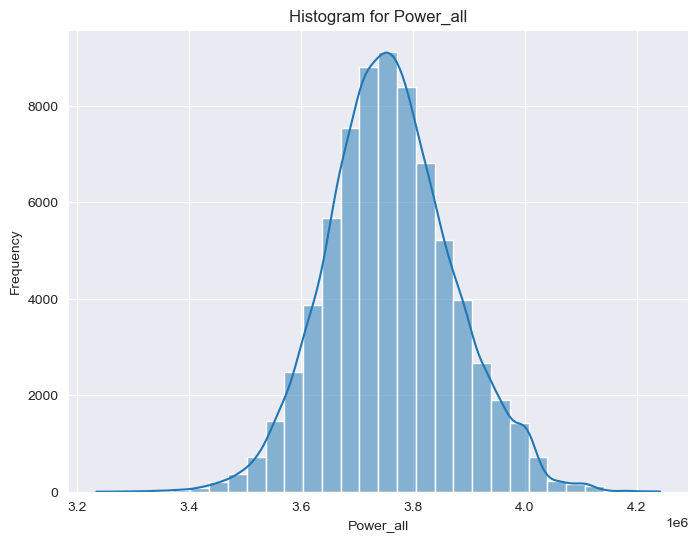

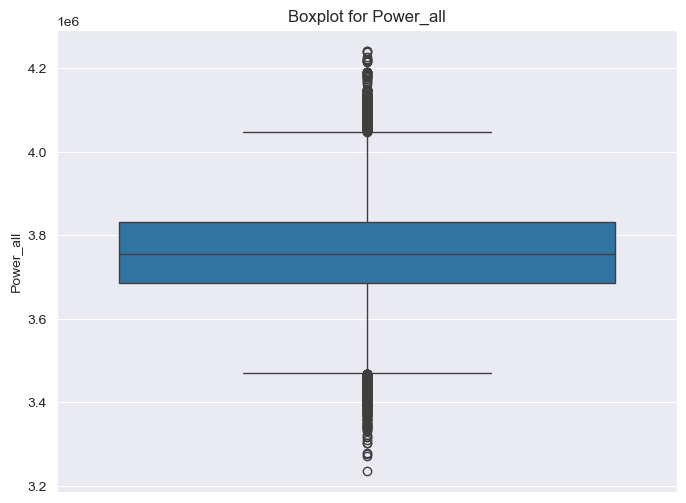

In [10]:
# Histogram dla kolumny Power_all
# sydney_df['Power_all'] = np.log(sydney_df['Power_all'] - sydney_df['Power_all'].min() + 1)

plt.figure(figsize=(8, 6))
sns.histplot(tasmania_df['Power_all'], kde=True, bins=30)
plt.title('Histogram for Power_all')
plt.xlabel('Power_all')
plt.ylabel('Frequency')
plt.show()

# Boxplot dla kolumny Power_all
plt.figure(figsize=(8, 6))
sns.boxplot(y=tasmania_df['Power_all'])
plt.title('Boxplot for Power_all')
plt.ylabel('Power_all')
plt.show()


In [11]:
upper_limit = tasmania_df['Power_all'].mean() + 3 * tasmania_df['Power_all'].std()
lower_limit = tasmania_df['Power_all'].mean() - 3 * tasmania_df['Power_all'].std()


print(upper_limit)
print(lower_limit)

final_df_new = tasmania_df.loc[(tasmania_df['Power_all'] < upper_limit) & (tasmania_df['Power_all'] > lower_limit)]


print("Liczba wierszy po filtracji:", len(final_df_new))
print("Oryginalna liczba wierszy:", len(tasmania_df))

tasmania_df = final_df_new


4096577.1704570074
3423696.6696083266
Liczba wierszy po filtracji: 71664
Oryginalna liczba wierszy: 71999


In [8]:
tasmania_df= tasmania_df.dropna()
tasmania_df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
71994    False
71995    False
71996    False
71997    False
71998    False
Length: 71999, dtype: bool

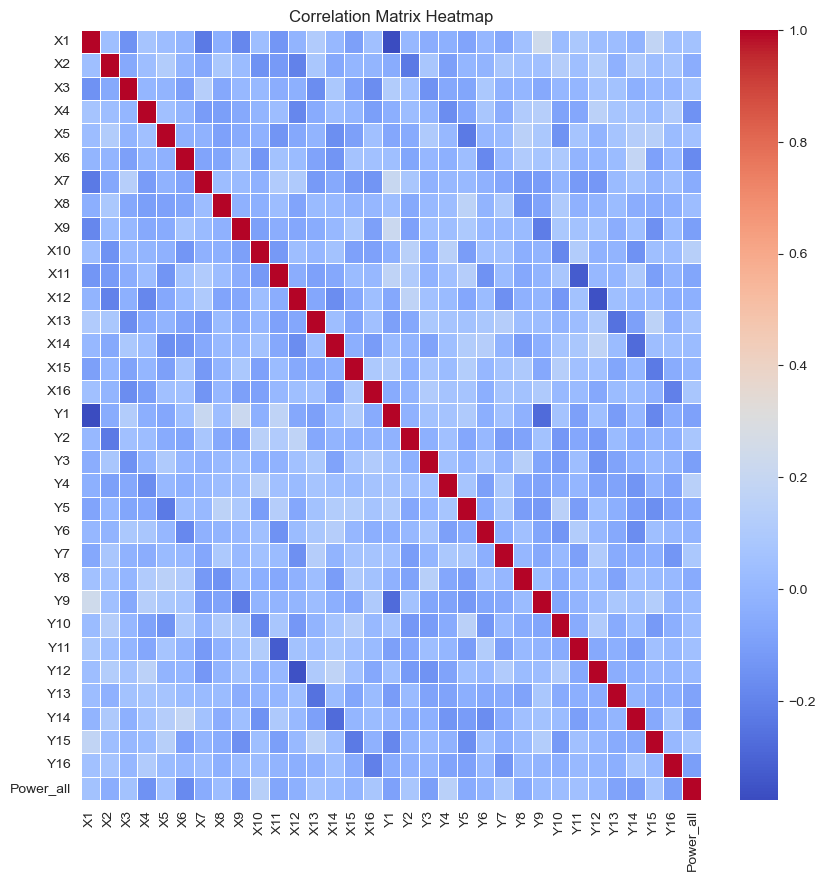

In [9]:
correlation_matrix = tasmania_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [12]:
# Przygotowanie cech (X) i etykiety (y)
X = tasmania_df[[f"X{i}" for i in range(1, 17)] + [f"Y{i}" for i in range(1, 17)]]
y = tasmania_df["Power_all"]

# Podział na zestawy train, validation i test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Informacja o rozmiarach zbiorów
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 50164 samples
Validation set: 10750 samples
Test set: 10750 samples


In [13]:
def calculate_rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mse, rmse

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)

# Obliczanie MSE, RMSE
mse_lr, rmse_lr = calculate_rmse(y_val, y_val_pred_lr)

# Obliczanie współczynnika determinacji R²
r2_lr = lr.score(X_val, y_val)  # R² dla modelu

# Wyświetlanie wyników
print(f"Linear Regression - MSE: {mse_lr}, RMSE: {rmse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 10239634920.125278, RMSE: 101191.08122816595, R²: 0.1446800795153923


In [18]:

# Tworzenie modelu XGBoost
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.11,
    max_depth=10,
    random_state=42,
    eval_metric="rmse"  # Tutaj definiujemy metrykę
)

# Trenowanie modelu z zestawem walidacyjnym
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_val, y_val)],  # Dodanie zestawu walidacyjnego
    verbose=True  # Wyświetlanie postępu
)

# Predykcja na danych testowych
y_pred = model.predict(X_test)

# Obliczanie MSE, RMSE i R²
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost - MSE: {mse}, RMSE: {rmse}, R²: {r2}")


[0]	validation_0-rmse:103210.65421	validation_1-rmse:103582.84541
[1]	validation_0-rmse:97998.90339	validation_1-rmse:98767.37465
[2]	validation_0-rmse:93507.66609	validation_1-rmse:94703.24257
[3]	validation_0-rmse:88832.36014	validation_1-rmse:90467.93617
[4]	validation_0-rmse:85145.33442	validation_1-rmse:87232.49583
[5]	validation_0-rmse:81993.89464	validation_1-rmse:84509.85005
[6]	validation_0-rmse:78877.79545	validation_1-rmse:81917.55490
[7]	validation_0-rmse:75946.41805	validation_1-rmse:79513.73415
[8]	validation_0-rmse:73295.35103	validation_1-rmse:77339.34608
[9]	validation_0-rmse:70630.10391	validation_1-rmse:75251.09334
[10]	validation_0-rmse:68638.23334	validation_1-rmse:73735.50854
[11]	validation_0-rmse:66537.17026	validation_1-rmse:72220.29194
[12]	validation_0-rmse:64932.19817	validation_1-rmse:71120.66475
[13]	validation_0-rmse:63403.16497	validation_1-rmse:70068.99091
[14]	validation_0-rmse:61691.11083	validation_1-rmse:68938.57840
[15]	validation_0-rmse:60073.9519

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definicja hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200],       # Zmniejszono do dwóch wartości
    'max_depth': [3, 5],             # Zmniejszono do dwóch wartości
    'learning_rate': [0.1,0.2]     # Zmniejszono do dwóch wartości
}


# Tworzenie modelu Gradient Boosting
model = GradientBoostingRegressor(random_state=42)

# Grid Search z walidacją krzyżową
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # używamy MSE jako funkcji kosztu
    cv=2,  # liczba podziałów do walidacji krzyżowej
    verbose=1,
    n_jobs=-1  # równoległe przetwarzanie
)

# Dopasowanie modelu do danych treningowych
grid_search.fit(X_train, y_train)

# Najlepszy model i jego hiperparametry
best_model = grid_search.best_estimator_
print("Najlepsze hiperparametry:", grid_search.best_params_)

# Ocena na zbiorze walidacyjnym
y_val_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
print(f"Gradient Boosting - MSE: {mse}, RMSE: {rmse}")


Fitting 2 folds for each of 8 candidates, totalling 16 fits
Najlepsze hiperparametry: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Gradient Boosting - MSE: 2600188417.655387, RMSE: 50992.04268957449
